# 三角板关键点检测-可视化训练日志

训练模型时在`work_dirs`目录生成记录训练日志，解析其中损失函数、评估指标等信息，并可视化。

同济子豪兄：https://space.bilibili.com/1900783

## 进入mmdetection主目录

In [1]:
import os
os.chdir('../MMPOSE/mmpose')

## 导入工具包

In [2]:
import pandas as pd
from tqdm import tqdm

import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['axes.unicode_minus']=False  # 用来正常显示负号

## 载入训练日志

In [7]:
# 日志文件路径
log_path = 'work_dirs/rtmpose-s-ear/20230614_165050/vis_data/scalars.json'

In [8]:
with open(log_path, "r") as f:
    json_list = f.readlines()

In [9]:
len(json_list)

1830

In [10]:
eval(json_list[4])

{'lr': 0.0008421368421052633,
 'data_time': 5.737975263595581,
 'loss': 0.41895063519477843,
 'loss_kpt': 0.41895063519477843,
 'acc_pose': 0.11160714285714286,
 'time': 14.827472257614136,
 'epoch': 1,
 'iter': 5,
 'memory': 1650,
 'step': 5}

In [24]:
df_train = pd.DataFrame()
df_test = pd.DataFrame()
for each in tqdm(json_list):
    if 'coco/AP' in each:
        df_test = df_test._append(eval(each), ignore_index=True)
    else:
        df_train = df_train._append(eval(each), ignore_index=True)

100%|██████████| 1830/1830 [00:00<00:00, 2316.92it/s]


In [25]:
df_train

,lr,data_time,loss,loss_kpt,acc_pose,time,epoch,iter,memory,step
0,4.000000e-08,12.956162,0.422014,0.422014,0.011905,57.568959,1.0,1.0,1605.0,1.0
1,2.105642e-04,6.533721,0.422320,0.422320,0.004464,29.024936,1.0,2.0,1650.0,2.0
2,4.210884e-04,4.370814,0.422628,0.422628,0.010417,19.415624,1.0,3.0,1650.0,3.0
3,6.316126e-04,5.176389,0.421862,0.421862,0.026786,16.498632,1.0,4.0,1650.0,4.0
4,8.421368e-04,5.737975,0.418951,0.418951,0.111607,14.827472,1.0,5.0,1650.0,5.0
...,...,...,...,...,...,...,...,...,...,...
1795,2.002894e-04,4.210289,0.044995,0.044995,0.997024,4.573489,300.0,1796.0,1650.0,1796.0
1796,2.001852e-04,4.198277,0.044972,0.044972,0.994048,4.561815,300.0,1797.0,1650.0,1797.0
1797,2.001042e-04,4.200229,0.045115,0.045115,0.989535,4.562335,300.0,1798.0,1650.0,1798.0
1798,2.000463e-04,4.202247,0.045076,0.045076,0.997024,4.565483,300.0,1799.0,1650.0,1799.0


In [26]:
df_test

,coco/AP,coco/AP .5,coco/AP .75,coco/AP (M),coco/AP (L),coco/AR,coco/AR .5,coco/AR .75,coco/AR (M),coco/AR (L),PCK,AUC,NME,data_time,time,step
0,0.000000,0.000000,0.000000,-1.0,0.000000,0.000000,0.000000,0.000000,-1.0,0.000000,0.267574,0.006122,0.245269,7.502224,7.711270,10.0
1,0.000000,0.000000,0.000000,-1.0,0.000000,0.000000,0.000000,0.000000,-1.0,0.000000,0.339002,0.008390,0.253958,0.783283,0.939663,20.0
2,0.000291,0.002912,0.000000,-1.0,0.000291,0.004762,0.047619,0.000000,-1.0,0.004762,0.353741,0.013605,0.242166,1.089637,1.207635,30.0
3,0.000000,0.000000,0.000000,-1.0,0.000000,0.000000,0.000000,0.000000,-1.0,0.000000,0.306122,0.007370,0.243820,0.785259,0.866257,40.0
4,0.000738,0.006422,0.000000,-1.0,0.000738,0.009524,0.071429,0.000000,-1.0,0.009524,0.378685,0.011338,0.221895,0.760279,0.860565,50.0
5,0.006631,0.054075,0.000000,-1.0,0.006631,0.019048,0.142857,0.000000,-1.0,0.019048,0.396825,0.010658,0.175701,0.769154,0.843984,60.0
6,0.004250,0.031359,0.000000,-1.0,0.004250,0.019048,0.142857,0.000000,-1.0,0.019048,0.439909,0.011168,0.169982,0.743187,0.853042,70.0
7,0.000141,0.000707,0.000000,-1.0,0.000141,0.004762,0.023810,0.000000,-1.0,0.004762,0.360544,0.009751,0.185875,0.757095,0.855808,80.0
8,0.000000,0.000000,0.000000,-1.0,0.000000,0.000000,0.000000,0.000000,-1.0,0.000000,0.310658,0.008163,0.219968,0.720502,0.830312,90.0
9,0.000000,0.000000,0.000000,-1.0,0.000000,0.000000,0.000000,0.000000,-1.0,0.000000,0.259637,0.004478,0.238943,0.754819,0.843911,100.0


## 导出训练日志表格

In [27]:
df_train.to_csv('训练日志-训练集.csv', index=False)
df_test.to_csv('训练日志-测试集.csv', index=False)

## 设置Matplotlib中文字体

In [28]:
# # windows操作系统
# plt.rcParams['font.sans-serif']=['SimHei']  # 用来正常显示中文标签 
# plt.rcParams['axes.unicode_minus']=False  # 用来正常显示负号

In [29]:
# Mac操作系统，参考 https://www.ngui.cc/51cto/show-727683.html
# 下载 simhei.ttf 字体文件
# !wget https://zihao-openmmlab.obs.cn-east-3.myhuaweicloud.com/20220716-mmclassification/dataset/SimHei.ttf

In [30]:
# Linux操作系统，例如 云GPU平台：https://featurize.cn/?s=d7ce99f842414bfcaea5662a97581bd1
# 如果遇到 SSL 相关报错，重新运行本代码块即可
!wget https://zihao-openmmlab.obs.cn-east-3.myhuaweicloud.com/20220716-mmclassification/dataset/SimHei.ttf -O /environment/miniconda3/lib/python3.7/site-packages/matplotlib/mpl-data/fonts/ttf/SimHei.ttf
!rm -rf /home/featurize/.cache/matplotlib

import matplotlib 
import matplotlib.pyplot as plt
matplotlib.rc("font",family='SimHei') # 中文字体


/environment/miniconda3/lib/python3.7/site-packages/matplotlib/mpl-data/fonts/ttf/SimHei.ttf: No such file or directory
'rm' �����ڲ����ⲿ���Ҳ���ǿ����еĳ���
���������ļ���


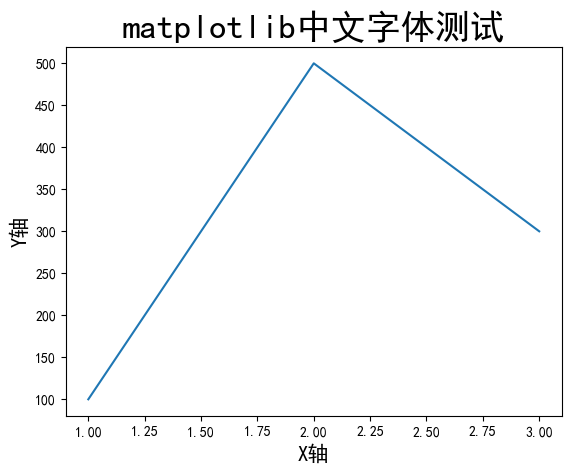

In [31]:
plt.plot([1,2,3], [100,500,300])
plt.title('matplotlib中文字体测试', fontsize=25)
plt.xlabel('X轴', fontsize=15)
plt.ylabel('Y轴', fontsize=15)
plt.show()

## 可视化辅助函数

In [32]:
from matplotlib import colors as mcolors
import random
random.seed(124)
colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k', 'tab:blue', 'tab:orange', 'tab:green', 'tab:red', 'tab:purple', 'tab:brown', 'tab:pink', 'tab:gray', 'tab:olive', 'tab:cyan', 'black', 'indianred', 'brown', 'firebrick', 'maroon', 'darkred', 'red', 'sienna', 'chocolate', 'yellow', 'olivedrab', 'yellowgreen', 'darkolivegreen', 'forestgreen', 'limegreen', 'darkgreen', 'green', 'lime', 'seagreen', 'mediumseagreen', 'darkslategray', 'darkslategrey', 'teal', 'darkcyan', 'dodgerblue', 'navy', 'darkblue', 'mediumblue', 'blue', 'slateblue', 'darkslateblue', 'mediumslateblue', 'mediumpurple', 'rebeccapurple', 'blueviolet', 'indigo', 'darkorchid', 'darkviolet', 'mediumorchid', 'purple', 'darkmagenta', 'fuchsia', 'magenta', 'orchid', 'mediumvioletred', 'deeppink', 'hotpink']
markers = [".",",","o","v","^","<",">","1","2","3","4","8","s","p","P","*","h","H","+","x","X","D","d","|","_",0,1,2,3,4,5,6,7,8,9,10,11]
linestyle = ['--', '-.', '-']

def get_line_arg():
    '''
    随机产生一种绘图线型
    '''
    line_arg = {}
    line_arg['color'] = random.choice(colors)
    # line_arg['marker'] = random.choice(markers)
    line_arg['linestyle'] = random.choice(linestyle)
    line_arg['linewidth'] = random.randint(1, 4)
    # line_arg['markersize'] = random.randint(3, 5)
    return line_arg

## 训练集损失函数

In [33]:
df_train.columns

Index(['lr', 'data_time', 'loss', 'loss_kpt', 'acc_pose', 'time', 'epoch',
       'iter', 'memory', 'step'],
      dtype='object')

In [34]:
metrics = ['loss', 'loss_kpt']

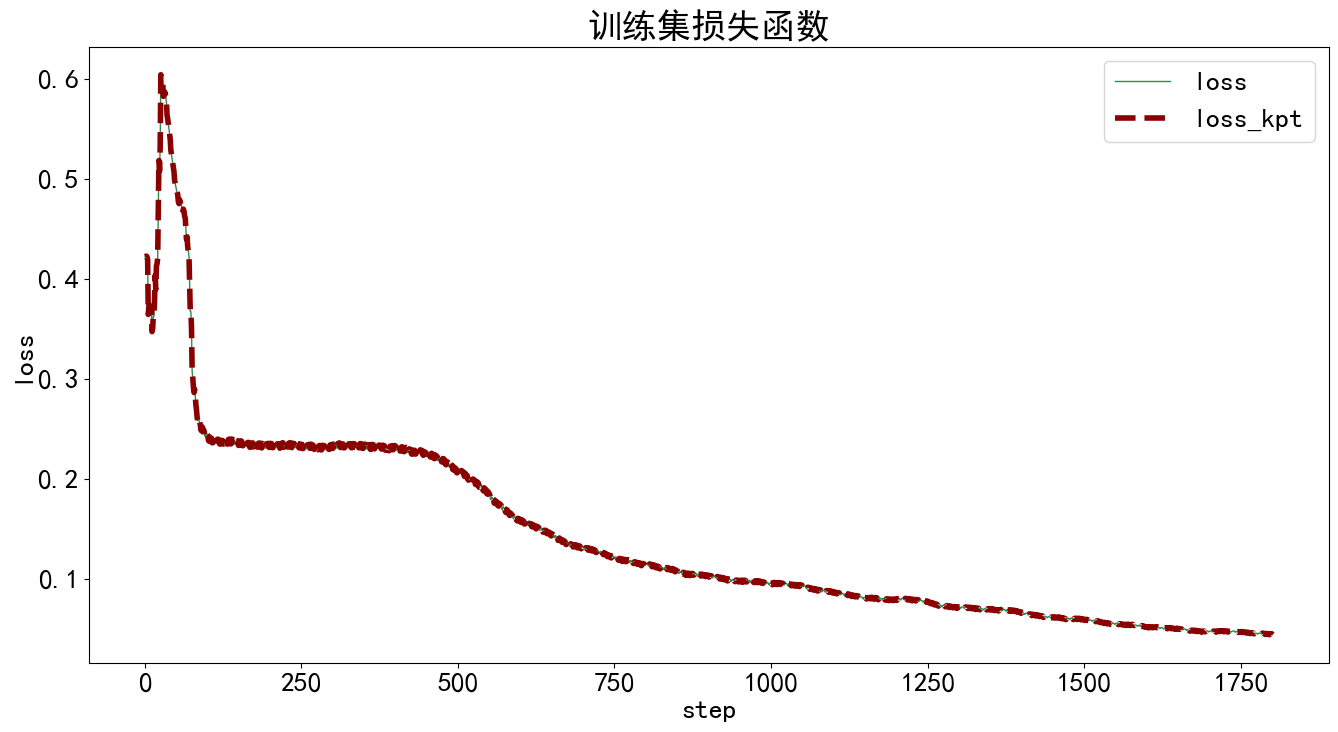

In [35]:
plt.figure(figsize=(16, 8))

x = df_train['step']
for y in metrics:
    plt.plot(x, df_train[y], label=y, **get_line_arg())

plt.tick_params(labelsize=20)
plt.xlabel('step', fontsize=20)
plt.ylabel('loss', fontsize=20)
plt.title('训练集损失函数', fontsize=25)
plt.savefig('训练集损失函数.pdf', dpi=120, bbox_inches='tight')

plt.legend(fontsize=20)

plt.show()

## 训练集准确率

In [36]:
metrics = ['acc_pose']

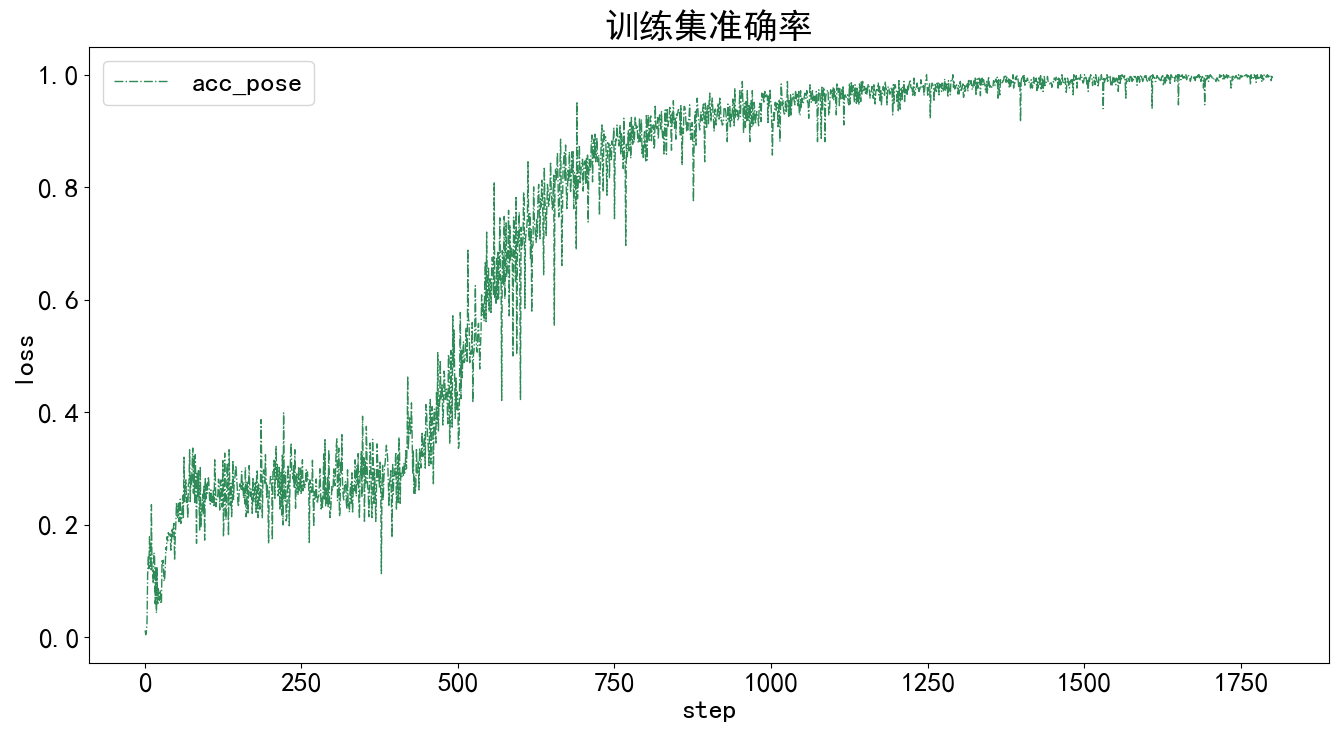

In [37]:
plt.figure(figsize=(16, 8))

x = df_train['step']
for y in metrics:
    plt.plot(x, df_train[y], label=y, **get_line_arg())

plt.tick_params(labelsize=20)
plt.xlabel('step', fontsize=20)
plt.ylabel('loss', fontsize=20)
plt.title('训练集准确率', fontsize=25)
plt.savefig('训练集准确率.pdf', dpi=120, bbox_inches='tight')

plt.legend(fontsize=20)

plt.show()

## 测试集评估指标-MS COCO Metric

In [38]:
df_test.columns

Index(['coco/AP', 'coco/AP .5', 'coco/AP .75', 'coco/AP (M)', 'coco/AP (L)',
       'coco/AR', 'coco/AR .5', 'coco/AR .75', 'coco/AR (M)', 'coco/AR (L)',
       'PCK', 'AUC', 'NME', 'data_time', 'time', 'step'],
      dtype='object')

In [39]:
metrics = ['coco/AP', 'coco/AP .5', 'coco/AP .75', 'coco/AP (M)', 'coco/AP (L)', 'coco/AR', 'coco/AR .5', 'coco/AR .75', 'coco/AR (M)', 'coco/AR (L)', 'PCK', 'AUC']


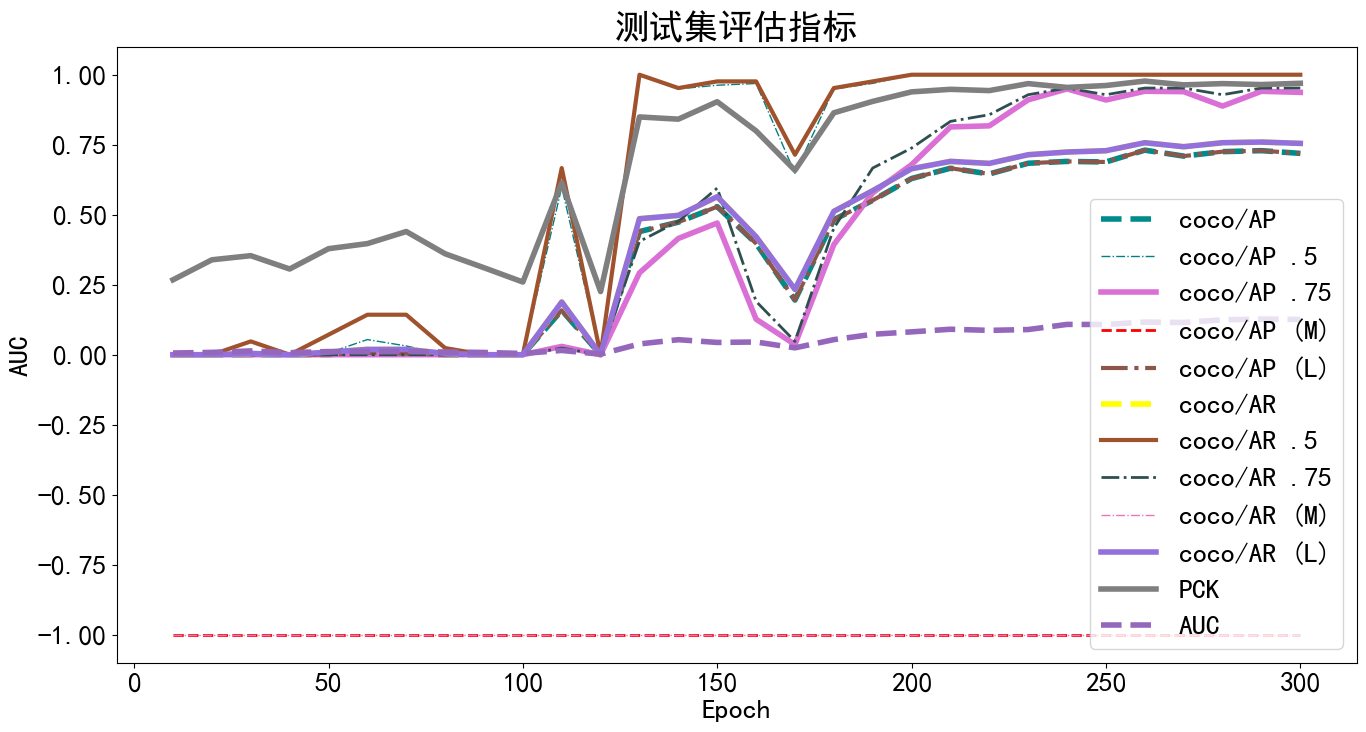

In [40]:
plt.figure(figsize=(16, 8))

x = df_test['step']
for y in metrics:
    plt.plot(x, df_test[y], label=y, **get_line_arg())

plt.tick_params(labelsize=20)
# plt.ylim([0, 100])
plt.xlabel('Epoch', fontsize=20)
plt.ylabel(y, fontsize=20)
plt.title('测试集评估指标', fontsize=25)
plt.savefig('测试集分类评估指标.pdf', dpi=120, bbox_inches='tight')

plt.legend(fontsize=20)

plt.show()

## 测试集评估指标-NME

In [41]:
metrics = ['NME']

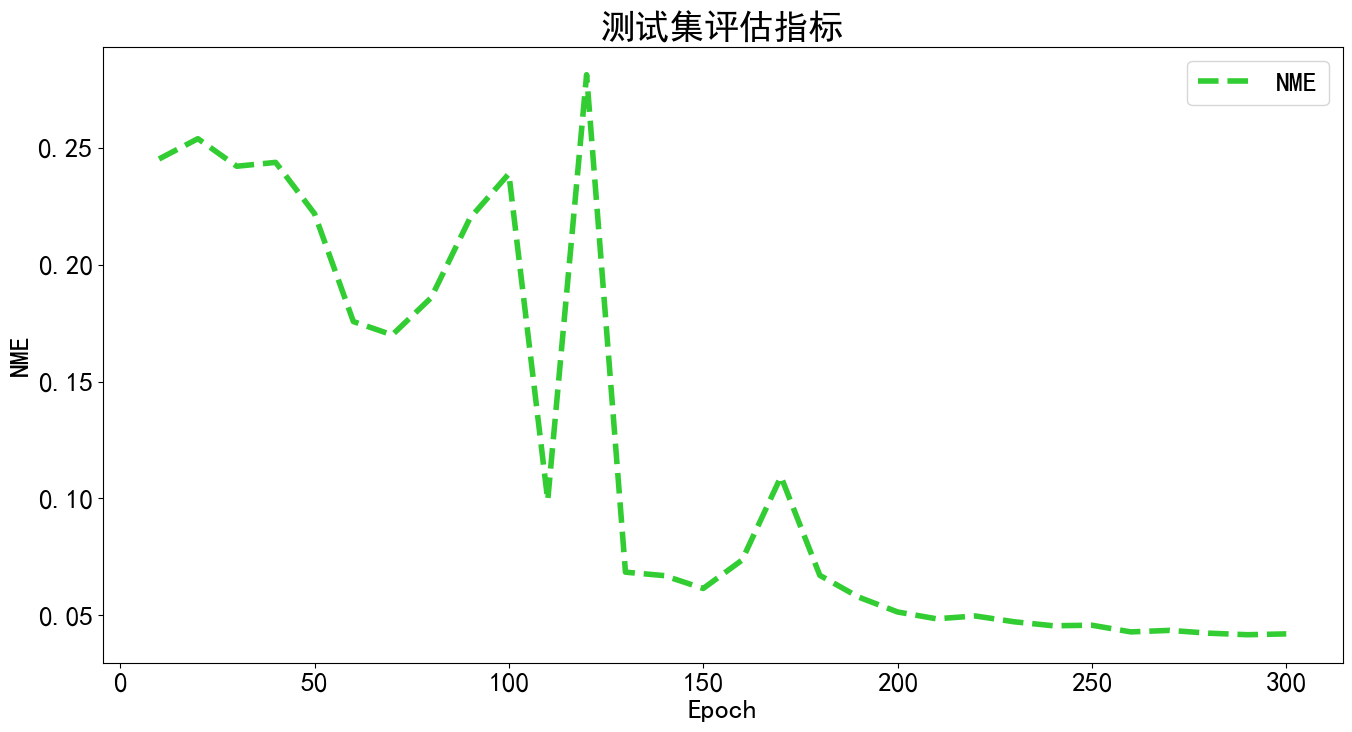

In [42]:
plt.figure(figsize=(16, 8))

x = df_test['step']
for y in metrics:
    plt.plot(x, df_test[y], label=y, **get_line_arg())

plt.tick_params(labelsize=20)
# plt.ylim([0, 100])
plt.xlabel('Epoch', fontsize=20)
plt.ylabel(y, fontsize=20)
plt.title('测试集评估指标', fontsize=25)
plt.savefig('测试集分类评估指标.pdf', dpi=120, bbox_inches='tight')

plt.legend(fontsize=20)

plt.show()